In [1]:
#https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

# Load Packages
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Read Data
df = pdr.DataReader(['CARL-B.CO', 'DANSKE.CO', 'ORSTED.CO', 'NZYM-B.CO', 'NOVO-B.CO'], 'yahoo', start='2018-01-01', end='2021-10-31')
#df = pdr.DataReader('NOVO-B.CO', 'yahoo', start='2018/01/01', end='2021/10/31')
df.head()

Attributes   Adj Close                                                  \
Symbols      CARL-B.CO   DANSKE.CO   ORSTED.CO   NZYM-B.CO   NOVO-B.CO   
Date                                                                     
2018-01-02  677.592346  189.887924  315.156372  326.745758  299.938385   
2018-01-03  680.501221  188.870804  311.240204  327.675598  303.575897   
2018-01-04  680.864868  190.513824  318.046844  329.535278  301.375427   
2018-01-05  692.136841  190.748581  317.767090  331.766876  303.890289   
2018-01-08  695.409363  191.843903  316.275269  330.279175  305.147675   

Attributes       Close                                                  ...  \
Symbols      CARL-B.CO   DANSKE.CO   ORSTED.CO   NZYM-B.CO   NOVO-B.CO  ...   
Date                                                                    ...   
2018-01-02  745.400024  242.699997  338.000000  351.399994  333.950012  ...   
2018-01-03  748.599976  241.399994  333.799988  352.399994  338.000000  ...   
2018-01-04  749.000000  243.500000  341.100006  354.399994  335.549988  ...   
2018-01-05  761.400024  243.800003  340.799988  356.799988  338.350006  ...   
2018-01-08  765.000000  245.199997  339.200012  355.200012  339.750000  ...   

Attributes        Open                                                  \
Symbols      CARL-B.CO   DANSKE.CO   ORSTED.CO   NZYM-B.CO   NOVO-B.CO   
Date                                                                     
2018-01-02  744.599976  242.100006  335.600006  355.000000  334.200012   
2018-01-03  745.000000  243.600006  336.799988  351.399994  334.950012   
2018-01-04  748.599976  242.500000  333.600006  353.299988  339.399994   
2018-01-05  757.000000  244.199997  341.500000  354.500000  337.000000   
2018-01-08  761.000000  244.699997  340.700012  358.000000  339.000000   

Attributes    Volume                                            
Symbols    CARL-B.CO  DANSKE.CO ORSTED.CO NZYM-B.CO  NOVO-B.CO  
Date                                                            
2018-01-02  205747.0  1365867.0  389557.0  388282.0  2206625.0  
2018-01-03  217016.0  1176850.0  437981.0  391363.0  1682377.0  
2018-01-04  182845.0  1990229.0  433740.0  284794.0  2251221.0  
2018-01-05  292834.0  1209424.0  275979.0  290485.0  1711938.0  
2018-01-08  259094.0  1565123.0  356896.0  578668.0  2160381.0  

[5 rows x 30 columns]

In [8]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,CARL-B.CO,DANSKE.CO,ORSTED.CO,NZYM-B.CO,NOVO-B.CO
Date,,,,,
2018-01-02,677.592346,189.887924,315.156372,326.745758,299.938385
2018-01-03,680.501221,188.870804,311.240204,327.675598,303.575897
2018-01-04,680.864868,190.513824,318.046844,329.535278,301.375427
2018-01-05,692.136841,190.748581,317.767090,331.766876,303.890289
2018-01-08,695.409363,191.843903,316.275269,330.279175,305.147675


In [9]:
#Covariance matrix
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,CARL-B.CO,DANSKE.CO,ORSTED.CO,NZYM-B.CO,NOVO-B.CO
Symbols,,,,,
CARL-B.CO,0.000196,0.000083,0.000082,0.000041,0.000074
DANSKE.CO,0.000083,0.000427,0.000058,0.000057,0.000031
ORSTED.CO,0.000082,0.000058,0.000337,0.000067,0.000079
NZYM-B.CO,0.000041,0.000057,0.000067,0.000246,0.000079
NOVO-B.CO,0.000074,0.000031,0.000079,0.000079,0.000224


In [10]:
#Correlation Matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,CARL-B.CO,DANSKE.CO,ORSTED.CO,NZYM-B.CO,NOVO-B.CO
Symbols,,,,,
CARL-B.CO,1.000000,0.286475,0.320730,0.186465,0.351863
DANSKE.CO,0.286475,1.000000,0.152775,0.175651,0.099292
ORSTED.CO,0.320730,0.152775,1.000000,0.234219,0.288035
NZYM-B.CO,0.186465,0.175651,0.234219,1.000000,0.337978
NOVO-B.CO,0.351863,0.099292,0.288035,0.337978,1.000000


In [11]:
## Portfolio variance
# Randomly weighted portfolio's variance
w = {'CARL-B.CO': 0.2, 'DANSKE.CO': 0.2, 'ORSTED.CO': 0.2, 'NZYM-B.CO': 0.2, 'NOVO-B.CO': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00010929637566760516

In [12]:
## Portfolio expected returns
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
CARL-B.CO    0.196564
DANSKE.CO    0.015758
ORSTED.CO    0.394655
NZYM-B.CO    0.199746
NOVO-B.CO    0.379952
dtype: float64

In [13]:
# Portfolio returns
w = [0.1, 0.2, 0.1, 0.2, 0.4]
port_er = (w*ind_er).sum()
port_er

0.25420372019378845

In [14]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
CARL-B.CO    0.221192
DANSKE.CO    0.326646
ORSTED.CO    0.290253
NZYM-B.CO    0.248190
NOVO-B.CO    0.236576
dtype: float64

In [15]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
CARL-B.CO,0.196564,0.221192
DANSKE.CO,0.015758,0.326646
ORSTED.CO,0.394655,0.290253
NZYM-B.CO,0.199746,0.248190
NOVO-B.CO,0.379952,0.236576


In [16]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [17]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [18]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [19]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,CARL-B.CO weight,DANSKE.CO weight,ORSTED.CO weight,NZYM-B.CO weight,NOVO-B.CO weight
0,0.256535,0.162788,0.298387,0.081039,0.093652,0.225077,0.301846
1,0.275317,0.171979,0.063444,0.151543,0.289521,0.233432,0.262059
2,0.309812,0.176937,0.183182,0.006810,0.343684,0.217084,0.249239
3,0.265488,0.171189,0.264950,0.154463,0.288435,0.076924,0.215228
4,0.206732,0.176432,0.272933,0.302990,0.010116,0.071967,0.341994


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

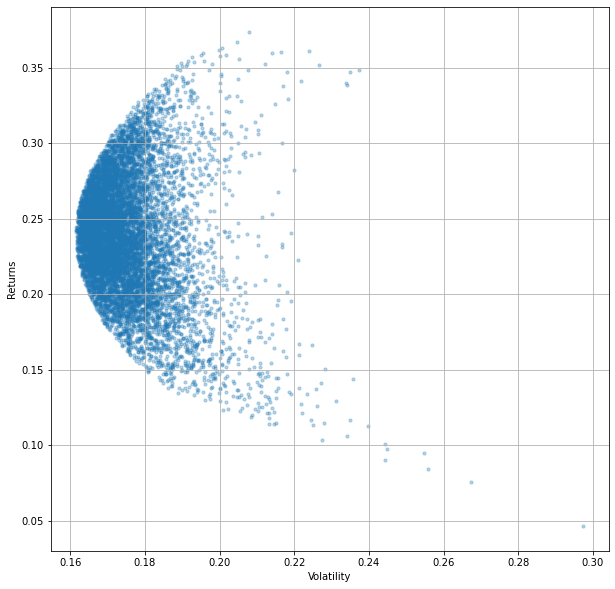

In [20]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [21]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns             0.242271
Volatility          0.161520
CARL-B.CO weight    0.308743
DANSKE.CO weight    0.102986
ORSTED.CO weight    0.104609
NZYM-B.CO weight    0.250229
NOVO-B.CO weight    0.233433
Name: 9900, dtype: float64

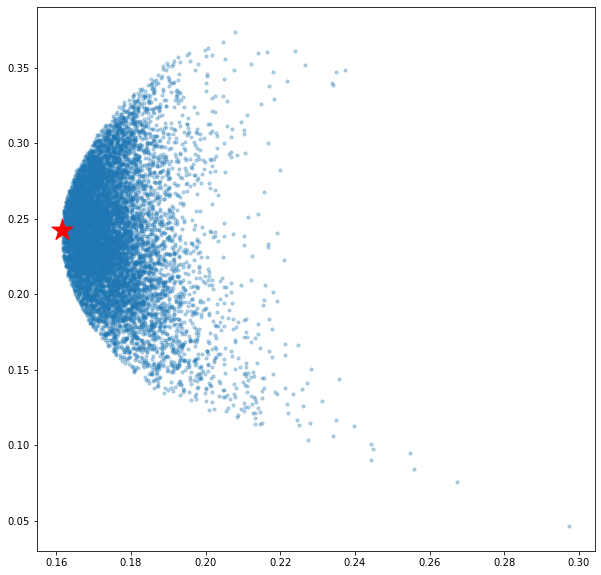

In [22]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [23]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns             0.353239
Volatility          0.189653
CARL-B.CO weight    0.078952
DANSKE.CO weight    0.005325
ORSTED.CO weight    0.334300
NZYM-B.CO weight    0.084404
NOVO-B.CO weight    0.497018
Name: 7071, dtype: float64

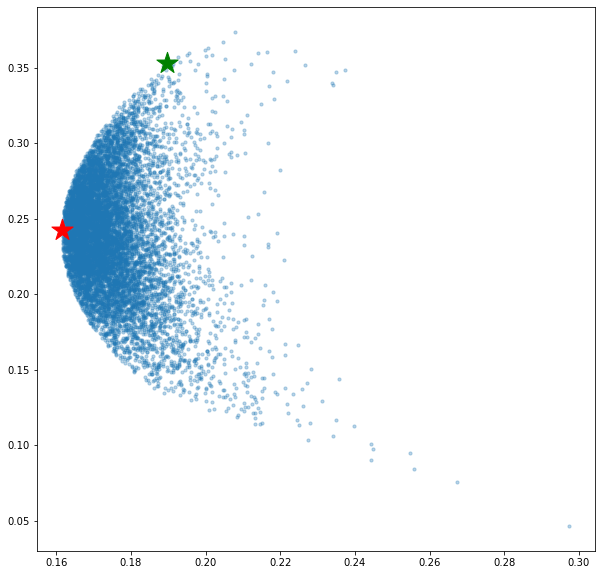

In [24]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)